Two great articles to get an insight on SGNS:
- http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
- http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/

Paper that is used for reference in our choices:
- https://arxiv.org/pdf/1605.09096.pdf

In [3]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter

In [4]:
from gensim.models import Word2Vec

/home/bbaga/src/anaconda2/envs/py34/lib/python3.4/site-packages/gensim/utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [5]:
def loadYear(pickle_path):
    with open( pickle_path, "rb" ) as f:
        BoW = pickle.load(f)
    data = []
    for m in BoW:
        for article in m:
            data.append(article)
    return data

In [36]:
def createModel(data):
    return Word2Vec(data, size=300, window = 4, min_count=50, workers=4, sg=1, negative=1)

In [12]:
with open( "../data/Cleaned/GDL/1847.pkl", "rb" ) as f:
    BoW1847 = pickle.load(f)

In [84]:
model1847 = createModel("../data/Cleaned/GDL/1847.pkl")

In [66]:
model1847.most_similar('empereur')

[('courait', 0.9983959197998047),
 ('napoléon', 0.9983020424842834),
 ('venue', 0.9981105327606201),
 ('moscou', 0.9971253871917725),
 ('saint', 0.9970275163650513),
 ('touchait', 0.9968169331550598),
 ('découvert', 0.9967697262763977),
 ('prisonnier', 0.9967272281646729),
 ('favorite', 0.9967223405838013),
 ('infant', 0.9967095255851746)]

In [85]:
model1847.most_similar('empereur')

[('tuileries', 0.9441243410110474),
 ('amiral', 0.9347630143165588),
 ('marie-christine', 0.9266616106033325),
 ('sétubal', 0.9236022233963013),
 ('marine', 0.9221740365028381),
 ('renversé', 0.9124029874801636),
 ('maroc', 0.9116957783699036),
 ('belges', 0.9101194143295288),
 ('naples', 0.9087281823158264),
 ('archiduchesse', 0.9084475636482239)]

In [54]:
data1990 = loadYear("../data/Cleaned/GDL/1990.pkl")

In [55]:
len(data1990)

40616

In [61]:
model1990 = Word2Vec(data1990, window = 6)

In [62]:
model1990.most_similar('empereur')

[('trône', 0.8133695125579834),
 ('tsar', 0.8035673499107361),
 ('jackson', 0.7934958338737488),
 ('juan', 0.7828020453453064),
 ('émigré', 0.7746816277503967),
 ('kochno', 0.7745887637138367),
 ('surnommé', 0.7533029317855835),
 ('ronald', 0.7496271133422852),
 ('prince', 0.7494315505027771),
 ('jérôme', 0.7493991851806641)]

At that point, we have implemented SGNS and now we want to add the constraint of time.

In [7]:
def loadYears(pickle_path, years):
    data = []
    for y in years:
        file = pickle_path + "/" + str(y) + ".pkl"
        if os.path.exists(file):
            tmp = loadYear(file)
            data += tmp
        else:
            print(file + " doesn't exist.")
    return data

In [8]:
test = loadYears("../data/Cleaned/GDL", range(1798,1810))

../data/Cleaned/GDL/1800.pkl doesn't exist.
../data/Cleaned/GDL/1801.pkl doesn't exist.
../data/Cleaned/GDL/1802.pkl doesn't exist.
../data/Cleaned/GDL/1803.pkl doesn't exist.


In [9]:
len(test)

18111

In [37]:
coucou = createModel(test)

In [11]:
coucou.most_similar("armée") # old

[('grande-armée', 0.6801369190216064),
 ('autrichienne', 0.6175743341445923),
 ('macdonald', 0.6097933053970337),
 ('cavalerie', 0.6047843098640442),
 ('avant-garde', 0.5972333550453186),
 ('jonction', 0.5957603454589844),
 ('arm', 0.5910748839378357),
 ('grandearmée', 0.5873991847038269),
 ('colonne', 0.5680898427963257),
 ('mantoue', 0.5666963458061218)]

In [38]:
coucou.most_similar("armée")

[('grande-armée', 0.612666666507721),
 ('avant-garde', 0.6105583906173706),
 ('mantoue', 0.5689403414726257),
 ('cavalerie', 0.5661460757255554),
 ('macdonald', 0.5638046860694885),
 ('autrichienne', 0.5629364848136902),
 ('colonne', 0.5628435015678406),
 ('dalmatie', 0.5579834580421448),
 ('saint-cyr', 0.548736035823822),
 ('marmont', 0.5485823750495911)]

In [2]:
import tsne

In [57]:
X = np.asarray([coucou['armée'], coucou['colonne'], coucou['milice'], coucou['diriger'], coucou['pays'], coucou['fribourg'], coucou['canton']])

Y = tsne.tsne(X, no_dims=2, initial_dims=300)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  7 ...
Mean value of sigma:  33554432.0
Iteration  10 : error is  8.04695919795
Iteration  20 : error is  7.73051770021
Iteration  30 : error is  14.0688038925
Iteration  40 : error is  14.1847018253
Iteration  50 : error is  16.7844541097
Iteration  60 : error is  8.61918191924
Iteration  70 : error is  8.07683187564
Iteration  80 : error is  8.01394909659
Iteration  90 : error is  7.98433340941
Iteration  100 : error is  8.15660805103
Iteration  110 : error is  0.67560399446
Iteration  120 : error is  0.635989776448
Iteration  130 : error is  0.587048583366
Iteration  140 : error is  0.52845910445
Iteration  150 : error is  0.460413078799
Iteration  160 : error is  0.383927068561
Iteration  170 : error is  0.310879584037
Iteration  180 : error is  0.252773358234
Iteration  190 : error is  0.21504597213
Iteration  200 : error is  0.194571602483
Iteration  210 : error is  0.182707316

In [58]:
Y

array([[  1.19640488e+02,  -4.04992321e+02],
       [  2.90913269e+02,   3.06107693e+02],
       [ -2.90913223e+02,  -3.06107652e+02],
       [ -7.21765372e-06,  -5.78816305e-06],
       [  4.10553707e+02,  -9.88844869e+01],
       [ -1.19640443e+02,   4.04992261e+02],
       [ -4.10553791e+02,   9.88845122e+01]])

In [83]:
def showPoints(data, label):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(data[:,0], data[:,1])
    for i in range(0,len(label)): 
        ax.annotate(label[i], xy=(data[i,0], data[i,1]), xytext=(data[i,0], data[i,1]))
    plt.show()

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  10 ...
Mean value of sigma:  33554432.0
Iteration  10 : error is  8.01526211622
Iteration  20 : error is  12.4123777408
Iteration  30 : error is  14.1952831831
Iteration  40 : error is  14.560212374
Iteration  50 : error is  11.6981489901
Iteration  60 : error is  11.3108857145
Iteration  70 : error is  11.1418732436
Iteration  80 : error is  11.418931186
Iteration  90 : error is  12.4117437849
Iteration  100 : error is  14.2118456627
Iteration  110 : error is  0.764305380738
Iteration  120 : error is  0.592703846914
Iteration  130 : error is  0.505263084077
Iteration  140 : error is  0.434149567188
Iteration  150 : error is  0.372401943554
Iteration  160 : error is  0.322213027489
Iteration  170 : error is  0.29083643445
Iteration  180 : error is  0.280963470595
Iteration  190 : error is  0.278338555948
Iteration  200 : error is  0.276034062875
Iteration  210 : error is  0.27393271

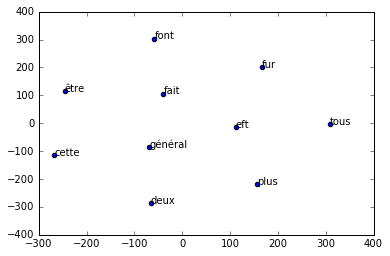

In [85]:
X_label = coucou.index2word[0:10]
X = np.asarray(coucou[X_label])
Y = tsne.tsne(X, no_dims=2, initial_dims=300)
showPoints(Y, X_label)

In [76]:
coucou.index2word[0]

'eft'